In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=1000,n_features=2,shuffle=True, centers=2, random_state=3)

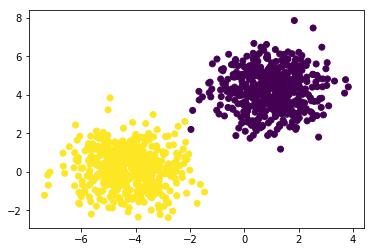

In [3]:
plt.scatter(X[:,0],X[:,1], c= y)
plt.show()

In [4]:
X.shape

(1000, 2)

In [5]:
def sigmoid(z):
    return (1.0)/(1+ np.exp(-z))

In [6]:
def predict(X,weights):
    z = np.dot(X,weights.T)
    return sigmoid(z)

In [7]:
def loss(X,y,weights):
    m= X.shape[0]
    y_ = predict(X,weights)
    
    l = np.mean(-y*np.log(y_)  - (1-y)*np.log(1-y_))
    
    return float(l/m)

In [8]:
def gradient(X,y,weights, learning_rate):
    m= X.shape[0]
    y_ = predict(X,weights)
    dw = np.dot(X.T,(y_-y))

    weights = weights - learning_rate * dw/float(m) 
    
    return weights

In [9]:
def update(X,y,learning_rate = 0.8, maxItr = 1000):
    
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros((X.shape[1],))
    i=0
    losses= []
    while i <= maxItr:
        if i%10 ==0:
            l = loss(X,y,weights)
            losses.append(l)
        
        weights = gradient(X,y,weights, learning_rate)
        
        
        
        i+=1
    
    return weights, losses

In [10]:
def getPredictions(X_test, weights):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
    
    predictions = predict(X_test,weights)
    
    labels = np.zeros(X_test.shape[0])
    labels[predictions>=0.5] =1
    
    return labels.astype("int")

In [11]:
w,l = update(X,y, learning_rate=0.01)

In [12]:
w

array([ 0.00338657, -1.17345417, -0.89533781])

In [13]:
l

[0.0006931471805599454,
 0.0004829994909004488,
 0.00036348393344549684,
 0.0002898602547652198,
 0.0002409362831121536,
 0.0002063800186787509,
 0.00018078147511218324,
 0.00016109687768833773,
 0.00014550303166143845,
 0.0001328487780339032,
 0.0001223745245255965,
 0.0001135601330715303,
 0.00010603806942820725,
 9.954155804592233e-05,
 9.387241579361899e-05,
 8.888041298971409e-05,
 8.444963506374671e-05,
 8.048923330575687e-05,
 7.692700614302201e-05,
 7.370485230986273e-05,
 7.077549014046092e-05,
 6.810005078798341e-05,
 6.564628582100937e-05,
 6.33872139835713e-05,
 6.130008667676369e-05,
 5.9365587988678456e-05,
 5.7567209546916744e-05,
 5.5890757218672044e-05,
 5.4323958334819014e-05,
 5.2856146332667e-05,
 5.147800558408356e-05,
 5.0181363422083286e-05,
 4.8959019484353065e-05,
 4.7804604787022524e-05,
 4.6712464654539416e-05,
 4.567756092131932e-05,
 4.4695389800682724e-05,
 4.376191256704088e-05,
 4.287349677647116e-05,
 4.20268662010735e-05,
 4.1219058004926416e-05,
 4.04

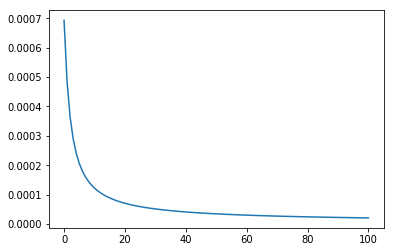

In [14]:
plt.plot(l)
plt.show()

In [15]:
p = getPredictions(X,w)

In [16]:
accuracy = np.sum(p==y)/X.shape[0]
print("Accuracy for Moon Dataset %0.3f"%(accuracy*100))

Accuracy for Moon Dataset 99.900


In [17]:
x1 = np.linspace(-7,3,10)
x2 = -(w[0] + w[1]*x1)/w[2]

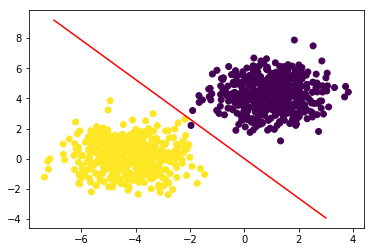

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,)
plt.plot(x1,x2,c='red')
plt.show()

## Testing on Non-Linear Dataset

In [19]:
X,y = make_moons(n_samples=1000,noise=0.2,random_state=1)

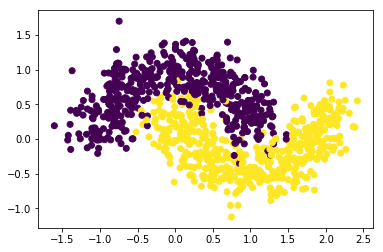

In [20]:
plt.scatter(X[:,0],X[:,1], c= y)
plt.show()

In [21]:
w,l = update(X,y)

In [22]:
w

array([ 0.67235684,  1.18928321, -4.97610737])

In [23]:
l

[0.0006931471805599454,
 0.00042138387397010684,
 0.0003702221524704047,
 0.00034738413408299244,
 0.0003337974124589786,
 0.0003246429209269099,
 0.00031807554699550767,
 0.0003131887256065141,
 0.0003094625643755418,
 0.0003065693705811355,
 0.0003042901279640571,
 0.0003024727039284061,
 0.0003010084697469817,
 0.00029981817781051515,
 0.0002988429767397994,
 0.0002980384851114746,
 0.0002973707763518963,
 0.000296813599510712,
 0.00029634642013374925,
 0.0002959530167939098,
 0.0002956204608914053,
 0.0002953383650643916,
 0.000295098322615136,
 0.00029489348461533154,
 0.0002947182374990111,
 0.00029456795486016725,
 0.00029443880464692234,
 0.00029432759813365826,
 0.0002942316707005284,
 0.00029414878704439563,
 0.00029407706531121006,
 0.0002940149159959181,
 0.00029396099245128935,
 0.00029391415058440426,
 0.00029387341587062363,
 0.0002938379562301698,
 0.00029380705962788774,
 0.000293780115498136,
 0.000293756599282749,
 0.0002937360595142967,
 0.00029371810698948725,
 0.0

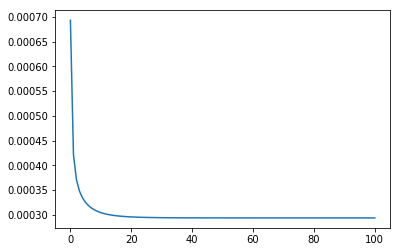

In [24]:
plt.plot(l)
plt.show()

In [25]:
p = getPredictions(X,w)

In [26]:
accuracy = np.sum(p==y)/X.shape[0]
print("Accuracy for Moon Dataset %0.3f"%(accuracy*100))

Accuracy for Moon Dataset 86.900


In [27]:
x1 = np.linspace(-2,3,10)
x2 = -(w[0] + w[1]*x1)/w[2]

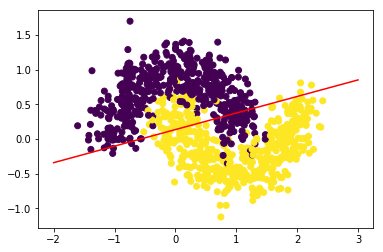

In [28]:
plt.scatter(X[:,0],X[:,1],c=y,)
plt.plot(x1,x2,c='red')
plt.show()